In [8]:
# Set notebook to display figures inline and set dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import os

In [9]:
# Save file paths
city_data_path = os.path.join(".","Resources","city_data.csv")
ride_data_path = os.path.join(".","Resources","ride_data.csv")

# Read csv data files into a data frame
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

In [10]:
# Combine data frames 
pyber_data_complete_df = pd.merge(ride_data_df,city_data_df, how="left",on=["city","city"])

# Create data frames for each type of city
urban_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Urban"]
suburban_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Suburban"]
rural_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Rural"]



In [11]:
# Get the sum of ride counts by type, Column 1 of the summary data frame
ride_count_by_type = pyber_data_complete_df.groupby(['type']).count()['ride_id']

# Get the number of drivers per city for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the sum of driver count by type and make a series, Column 2 of the summary data frame
driver_count_by_type = pd.Series([np.sum(rural_driver_count),
                                  np.sum(suburban_driver_count),
                                  np.sum(urban_driver_count)],
                                  index = ['Rural','Suburban','Urban'])

# Get the sum of fares by type, Column 3 of the summary data frame
sum_fares_by_type = pyber_data_complete_df.groupby(['type']).sum()['fare']

# Get the average fare by type, Column 4 of the summary data frame
avg_fare_by_type = sum_fares_by_type/ride_count_by_type

# Get the average fare per driver by type, Column 5 of the summare data frame
avg_fare_per_driver = sum_fares_by_type/driver_count_by_type


In [12]:
# Create summary data frame, referenced https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
summary_by_type_df = pd.DataFrame({'Total Rides':ride_count_by_type.tolist(),
                         'Total Drivers':driver_count_by_type.tolist(),
                         'Total Fares':sum_fares_by_type.tolist(),
                         'Average Fare per Ride':avg_fare_by_type.tolist(),
                         'Average Fare per Driver':avg_fare_per_driver.tolist()},index=ride_count_by_type.index)

# Create a copy of summary data frame for formatting
formatted_summary_df = summary_by_type_df
# Format each column
formatted_summary_df['Total Rides'] = formatted_summary_df['Total Rides'].map('{:,}'.format)
formatted_summary_df['Total Drivers'] = formatted_summary_df['Total Drivers'].map('{:,.0f}'.format)
formatted_summary_df['Total Fares'] = formatted_summary_df['Total Fares'].map('${:,.2f}'.format)
formatted_summary_df['Average Fare per Ride'] = formatted_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
formatted_summary_df['Average Fare per Driver'] = formatted_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

formatted_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
# Create a new data frame from pyber_data_complete_df with selected columns, referenced https://medium.com/@kasiarachuta/choosing-columns-in-pandas-dataframe-d0677b34a6ca
fare_by_date_df = pyber_data_complete_df[['date','type','fare']]


# Set index for df as 'date', referenced https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
fare_by_date_df.set_index('date')

# Rename Columns, referenced https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
fare_by_date_df = fare_by_date_df.rename(columns={'date':'Date',
                                                  'type':'City Type',
                                                  'fare':'Fare'})

total_fare_by_type_series = fare_by_date_df.groupby(['City Type','Date']).sum()['Fare']

# Create data frame and then pivot to use City Type as the columns, reference Gaubert Santiago TA
total_fares_by_type_df = total_fare_by_type_series.reset_index()
pivot_df = total_fares_by_type_df.pivot(index='Date',columns='City Type')['Fare']

# Set index type to datetime, referenced https://stackoverflow.com/questions/40815238/python-pandas-convert-index-to-datetime
pivot_df.index = pd.to_datetime(pivot_df.index)

# Use resample to sum the fares weekly, referenced linked reference in the module: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
weekly_fares_df = pivot_df.resample('W', level=0).sum()

# Place restrictions on the date ranged to be analyzed
weekly_fares_thru_April_df = weekly_fares_df.loc['2019-01-01':'2019-04-28']



<IPython.core.display.Javascript object>


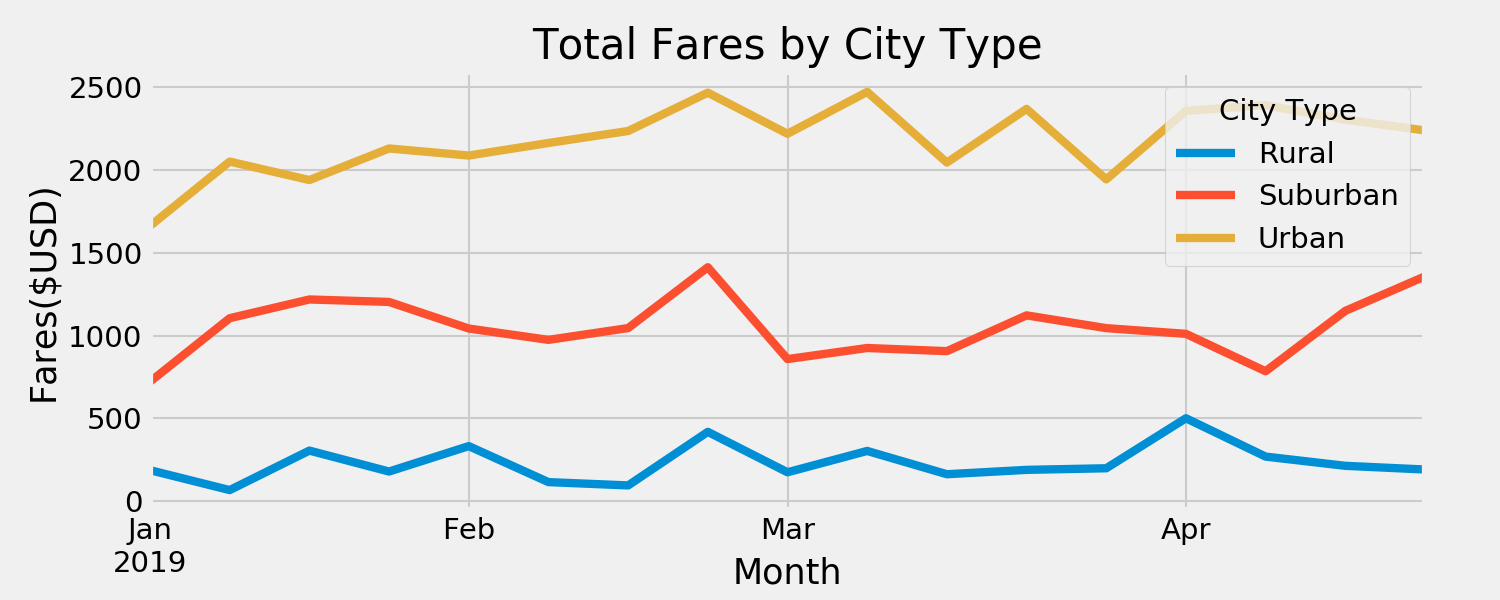

In [7]:
# Create line plot to analyze the total fares by City Type

# Set plot style to fivethirtyeight, referenced linked resource in the module https://matplotlib.org/3.1.1/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

# Use df.plot to plot weekly_fares_thru_April_df, adjust size to w = 10" and h = 4"
weekly_fares_thru_April_df.plot(figsize=(10,4))

# Set title and ylabel
plt.title('Total Fares by City Type')
plt.ylabel('Fares($USD)')

# Set xlabel and reduce the default padding, referenced https://stackoverflow.com/questions/21288062/second-y-axis-label-getting-cut-off/21288063
plt.xlabel('Month', labelpad = -10)

# Add background padding on the left and bottom, referenced https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left=0.10)
plt.gcf().subplots_adjust(bottom=0.15)

# Save figure and plot
plt.savefig('Analysis\Fig_Challenge.png')
plt.show()